In [1]:
#importing necessary libraries
import pandas as pd
from pyspark.sql.functions import *
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.patches as patches
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import descartes


In [2]:
path="s3://finalgeodata/"

In [3]:
#Extracting lat_longs.txt as text file using inbuilt sparkcontext
df = sc.textFile(path+"lat_longs.txt").map(lambda x: (x, )).toDF()

In [4]:
#Splitting the columns to 3 seperate columns
df=df.withColumn("latitude",split(df._1," ").getItem(0)).withColumn("longitude",split(df._1," ").getItem(1)).withColumn("name_of_page",split(df._1," ").getItem(2))

In [5]:
#drop the original unnecessary column
df=df.drop('_1')

In [6]:
df.show()

+-------------------+------------------+--------------------+
|           latitude|         longitude|        name_of_page|
+-------------------+------------------+--------------------+
|               36.7| 3.216666666666667|<http://dbpedia.o...|
|               42.5|1.5166666666666666|<http://dbpedia.o...|
| 12.516666666666667|-70.03333333333333|<http://dbpedia.o...|
| -8.833333333333334|13.333333333333334|<http://dbpedia.o...|
| 41.333333333333336|              19.8|<http://dbpedia.o...|
|  34.53333333333333| 69.13333333333334|<http://dbpedia.o...|
| 40.416666666666664|49.833333333333336|<http://dbpedia.o...|
|  39.93333333333333| 32.86666666666667|<http://dbpedia.o...|
|  52.36666666666667|               4.9|<http://dbpedia.o...|
|              50.46|              2.13|<http://dbpedia.o...|
| 17.116666666666667|            -61.85|<http://dbpedia.o...|
|  57.04638888888889| 9.919166666666667|<http://dbpedia.o...|
|              56.15|10.216666666666667|<http://dbpedia.o...|
|       

In [7]:
#Finally writing the output to s3 bucket
df.write.csv("s3a://finalgeodata/DBpedialocation",header=True)
print("uploading complete")

uploading complete


In [8]:
#converting to pandas for easier visualization
df=df.toPandas()

In [9]:
lon_dat=[]
lat_dat=[]
lon=df['longitude']
lat=df['latitude']
for i in lon:
    lon_dat.append(float(i))
for i in lat:
    lat_dat.append(float(i))

In [10]:
#creation of a new geo dataframe which has geo location point
geometry = [Point(xy) for xy in zip(lon_dat,lat_dat)]
gdf = GeoDataFrame(df, geometry=geometry)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


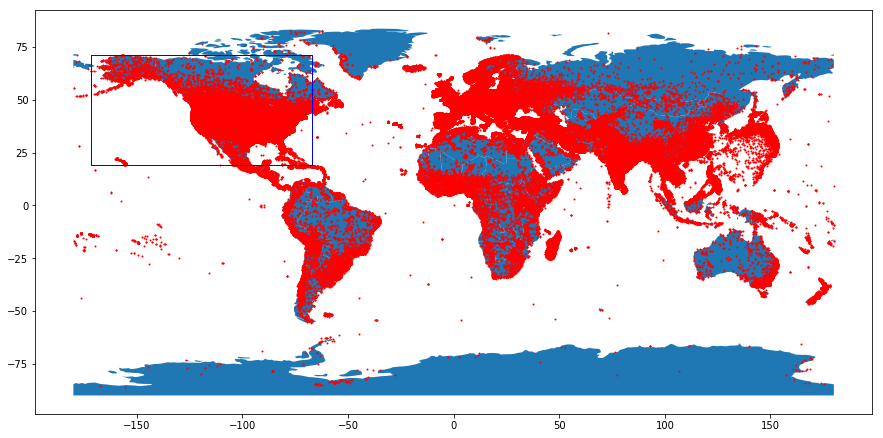

In [11]:
ax = world.plot(figsize=(15,15))
box_oz = world[world['name']=='United States of America'].copy().envelope
gdf.plot(ax=ax,marker='o', color='red', markersize=1,antialiased=True)
box_oz.plot(ax=ax, edgecolor='blue', facecolor='none')